# Tutorial

This notebook shows an example Exploratory Data Analysis utilizing Data Describe.

In [1]:
import mwdata as mw

C:\tools\Miniconda3\envs\mw-data_describe\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning:

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.

C:\tools\Miniconda3\envs\mw-data_describe\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning:

The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.



## Data
This tutorial uses toy datasets from sklearn. For loading real datasets, consider using the `mw.load_data` wrapper! Try `help(mw.load_data)` for more information.

In [2]:
help(mw.load_data)

Help on function load_data in module mwdata.utilities.load_data:

load_data(filepath, kwargs=None)
    Create pandas data frame from filepath
    
    Args:
        filepath: The file path
        kwargs: Keyword arguments to pass to the reader
            .shp: Uses geopandas.read_file
            .csv, .json, and other: Uses pandas.read_csv or pandas.read_json
    
    Returns:
        A pandas data frame



In [3]:
from sklearn.datasets import load_boston
import pandas as pd

In [4]:
dat = load_boston()
df = pd.DataFrame(dat['data'], columns=dat['feature_names'])
df['price'] = dat['target']

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Data Overview

In [6]:
df.shape

(506, 14)

First we inspect some of the overall statistics about the data. Some examples of interesting things to note:
- 93% of `CHAS` are the same value, zero
- `ZN` also has a high amount of zeros
- The mean of `TAX` is significantly higher than the median, suggesting this is right-skewed

In [7]:
mw.data_summary(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
Data Type,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
Mean,3.61352,11.3636,11.1368,0.06917,0.554695,6.28463,68.5749,3.79504,9.54941,408.237,18.4555,356.674,12.6531,22.5328
Standard Deviation,8.60155,23.3225,6.86035,0.253994,0.115878,0.702617,28.1489,2.10571,8.70726,168.537,2.16495,91.2949,7.14106,9.1971
Median,0.25651,0,9.69,0,0.538,6.2085,77.5,3.20745,5,330,19.05,391.44,11.36,21.2
Min,0.00632,0,0.46,0,0.385,3.561,2.9,1.1296,1,187,12.6,0.32,1.73,5
Max,88.9762,100,27.74,1,0.871,8.78,100,12.1265,24,711,22,396.9,37.97,50
# Zeros,0,372,0,471,0,0,0,0,0,0,0,0,0,0
# Nulls,0,0,0,0,0,0,0,0,0,0,0,0,0,0
% Most Frequent Value,0.4,73.52,26.09,93.08,4.55,0.59,8.5,0.99,26.09,26.09,27.67,23.91,0.59,3.16


We can also look at a visual representation of the data as a heatmap:

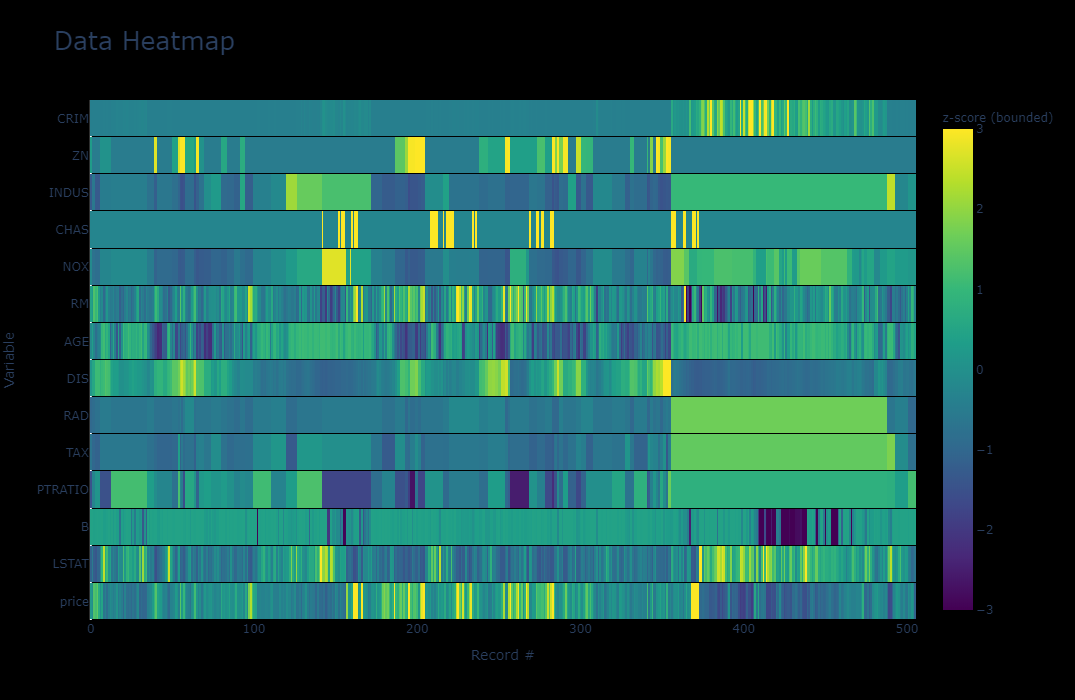

In [8]:
mw.data_heatmap(df)

There are some sections of the data which have exactly the same values for some columns. For example, `RAD` = 1.661245 between record number 356 ~ 487. Similar patterns appear for `INDUS` and `TAX`. Is this a sorting issue or is there something else going on? Some additional investigation into data collection may answer these questions.

We can also look at the correlations:

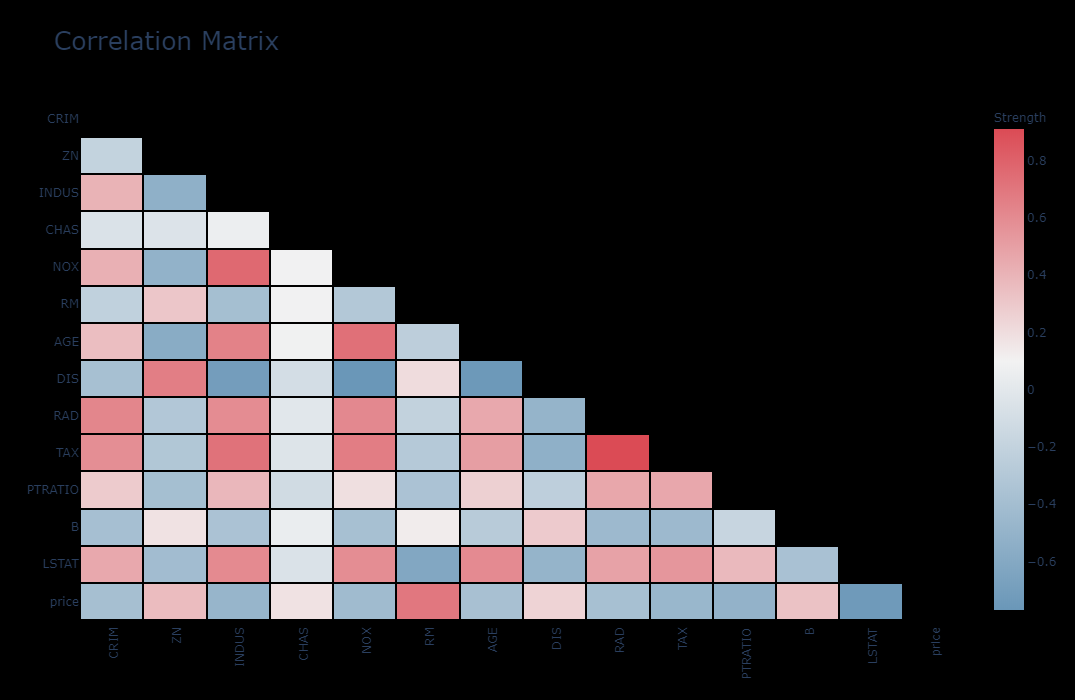

In [9]:
mw.correlation_matrix(df)

Features like `AGE` and `DIS` appear to be inversely correlated. `CHAS` doesn't appear to have strong correlation with any other feature.

It might also help to re-order the features for comparisons using the `cluster` argument.

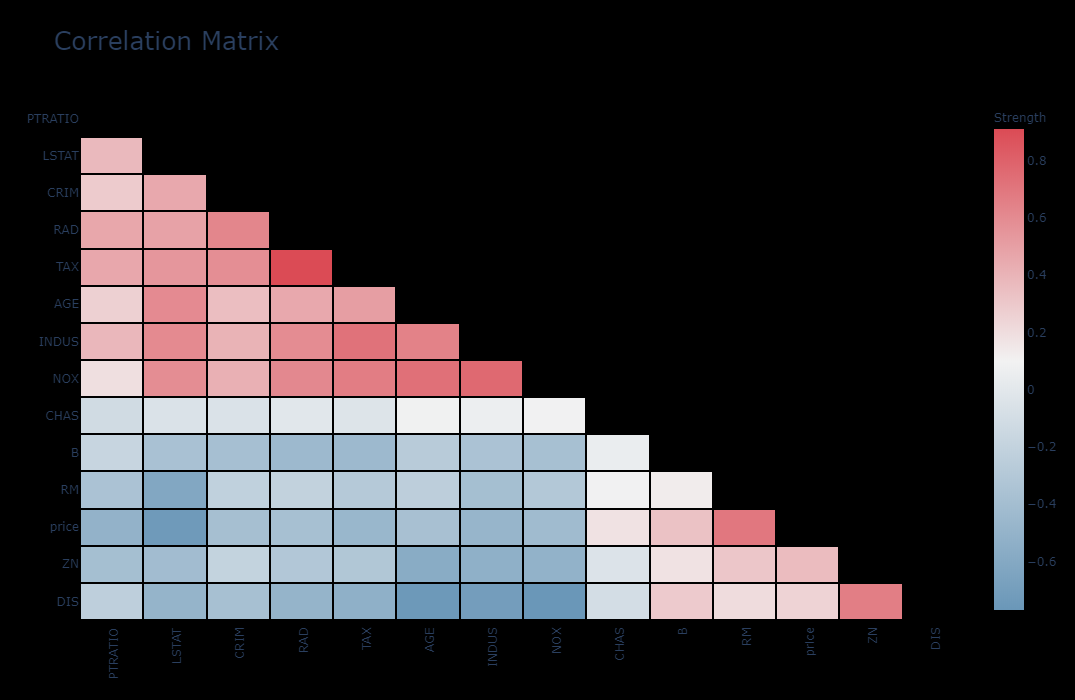

In [10]:
mw.correlation_matrix(df, cluster=True)

From this plot we can observe there are are two inversely related groups of features: `PTRATIO` to `NOX` and `B` to `DIS`.

## Data Inspection
We can also do some more detailed inspection of indiviudal features. 

We can show histograms and violin plots of each numeric feature using the `mw.distribution` function.

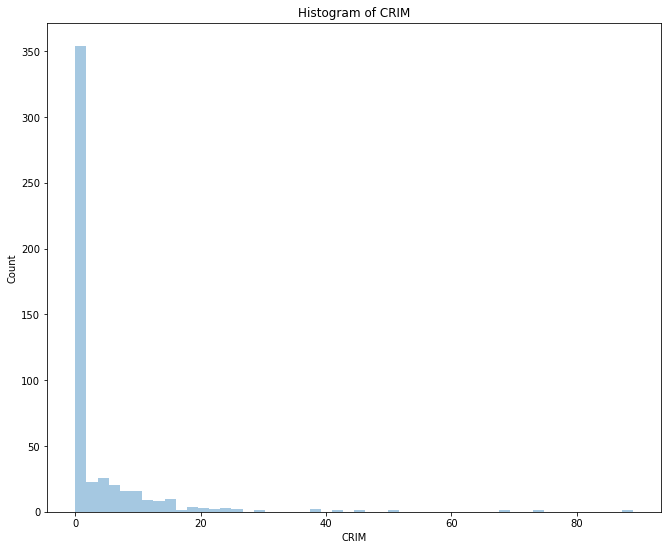

In [11]:
# Note: this is an error with the current version 0.2a
mw.distribution(df, plot_all=True)

We can also look at bivariate distributions using scatter plots. In addition to plotting all pairs in a scatterplot matrix, we can also specify a filter for certain scatterplot diagnostic features.

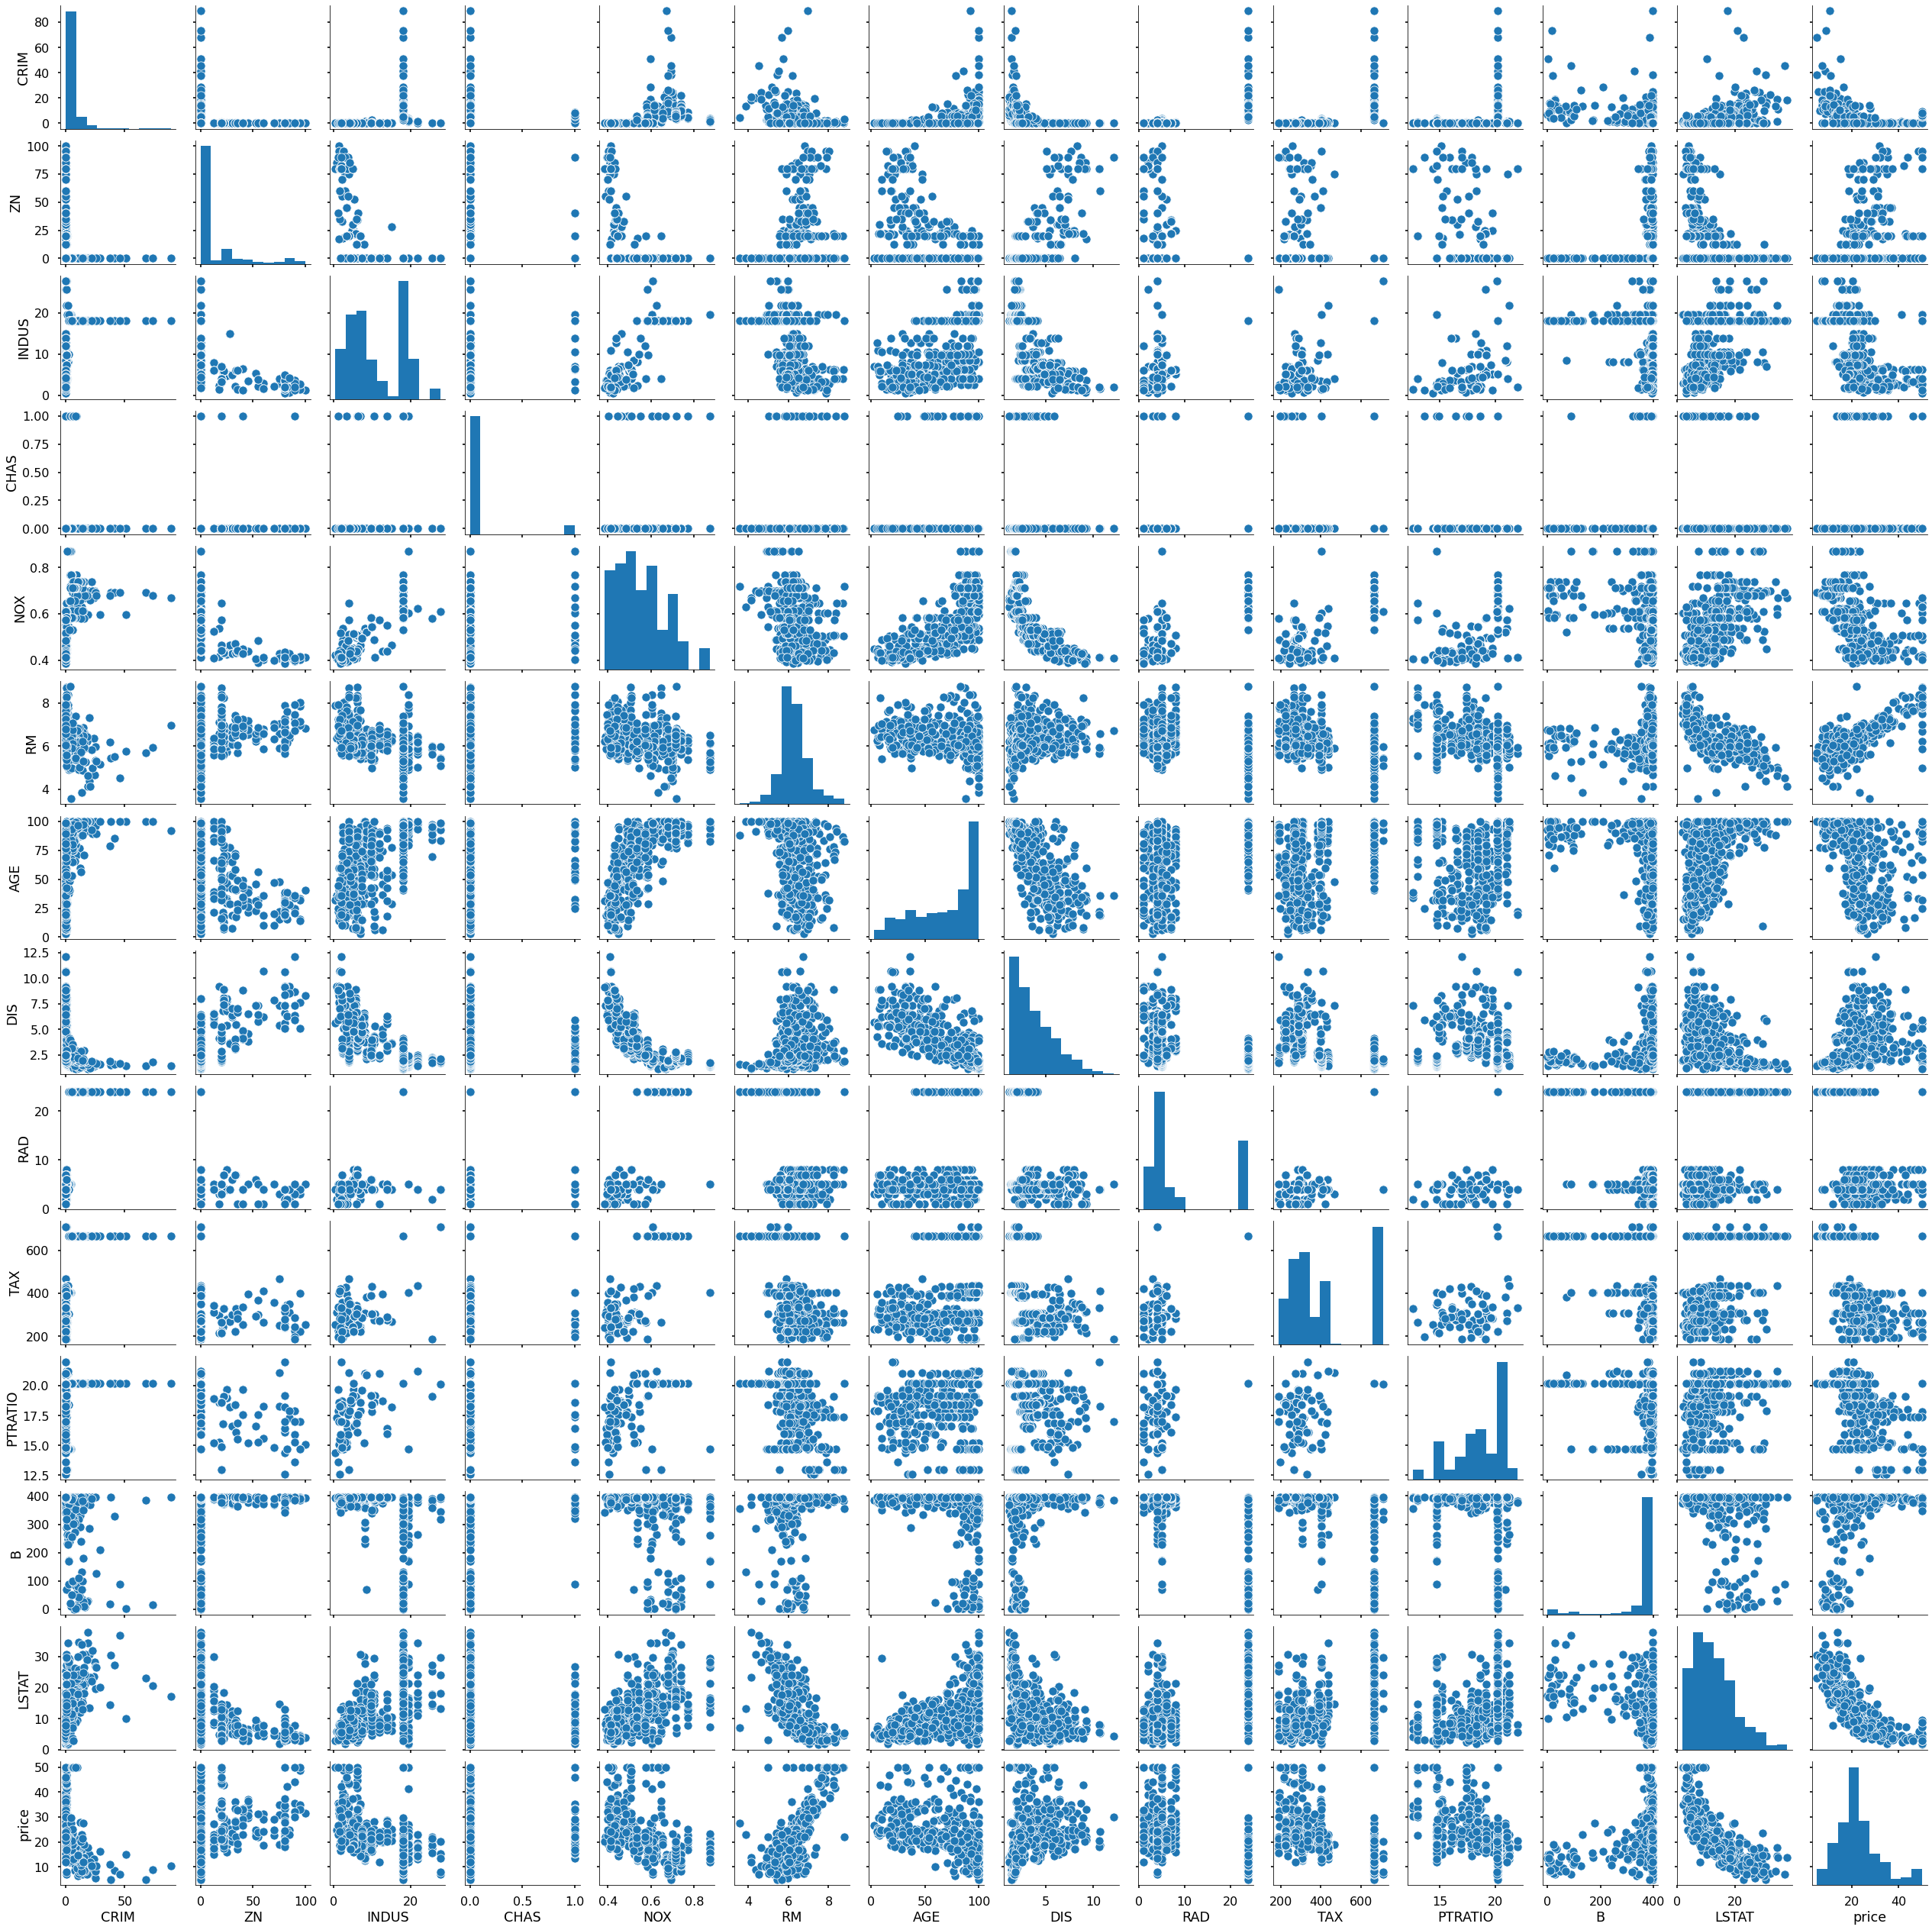

In [12]:
mw.scatter_plots(df, plot_mode='matrix')

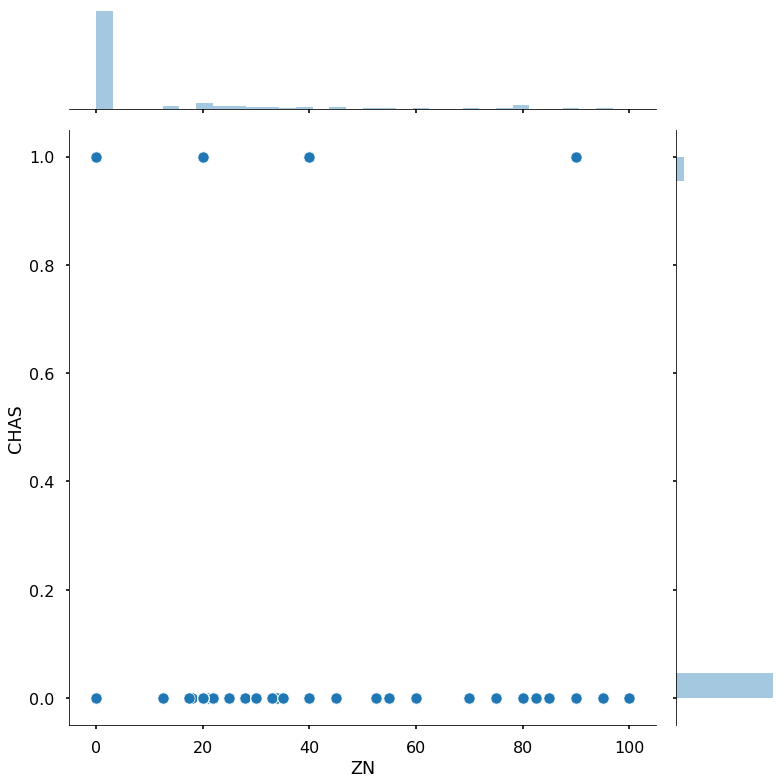

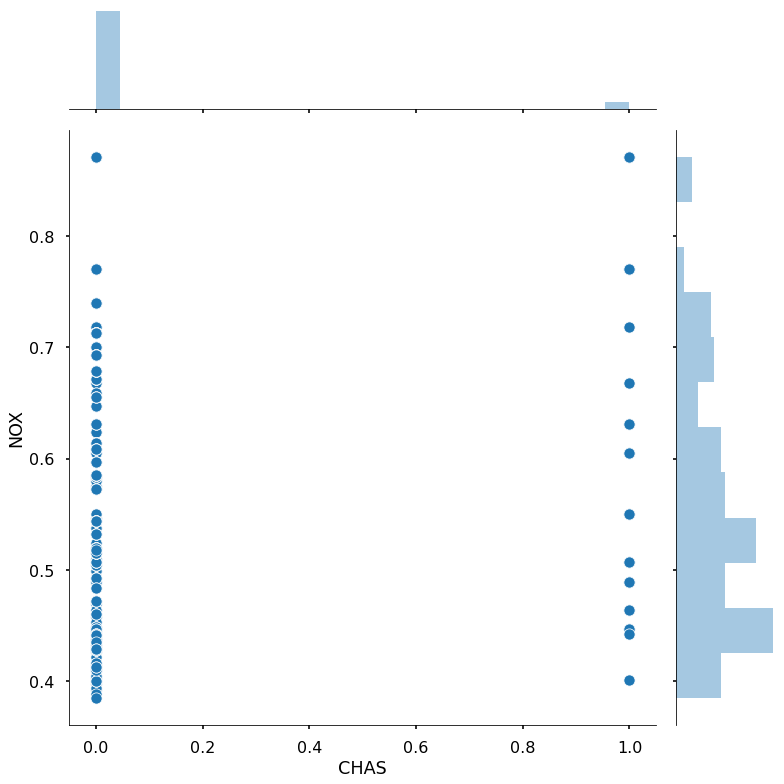

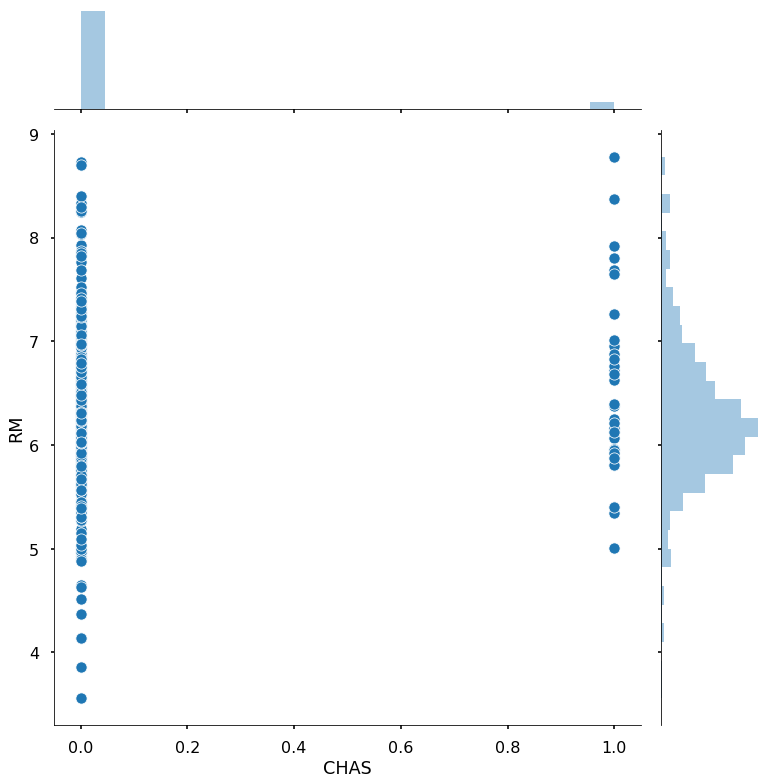

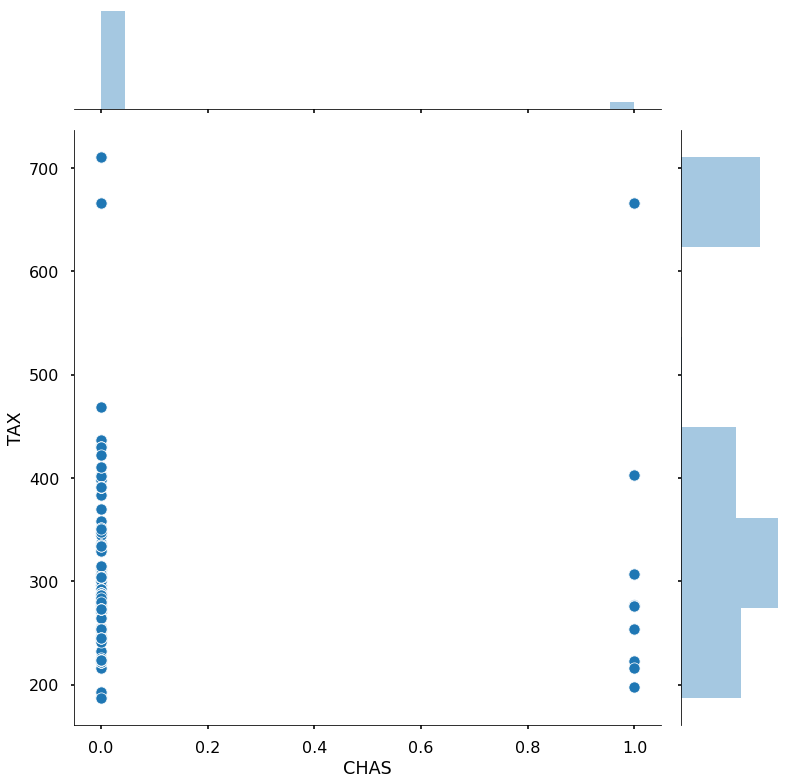

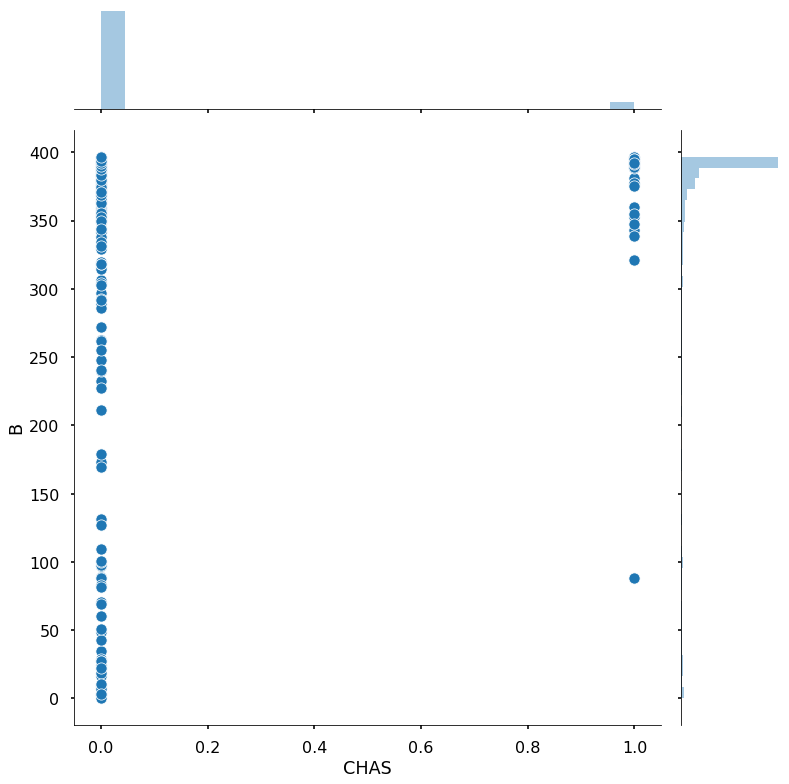

In [13]:
mw.scatter_plots(df, threshold={'Outlier': 0.9})

## Advanced Analysis
In addition to general plots, we can also use some ML-specific analyses as shown below.

### Cluster Analysis
What segments or groups are present in the data?

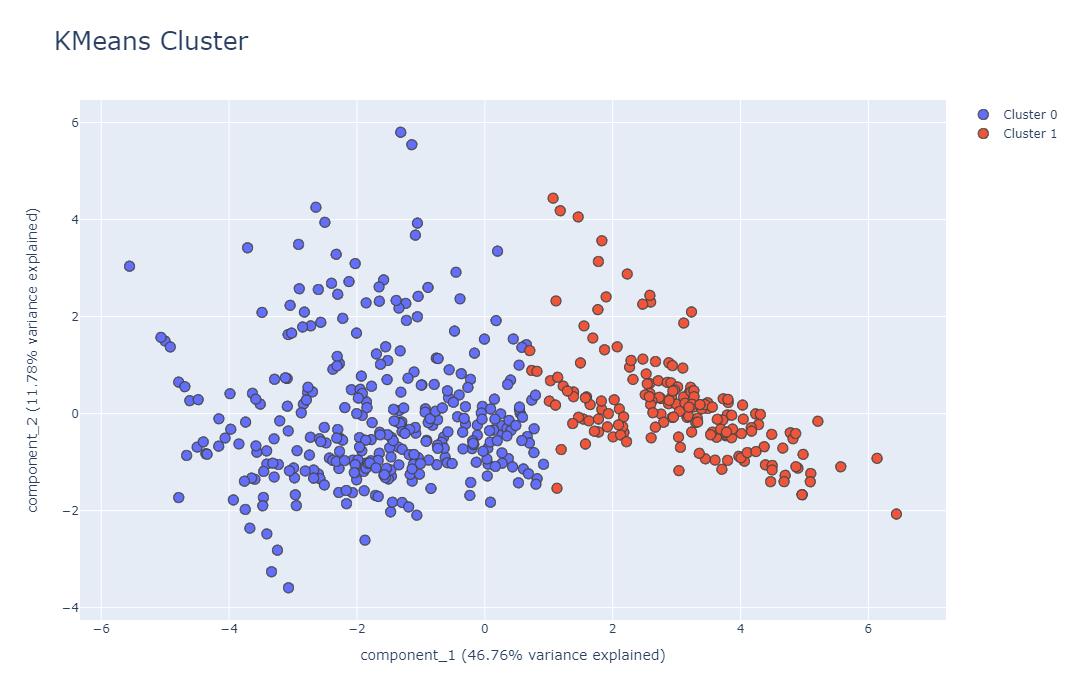

In [14]:
mw.cluster(df)

From this plot, we see that there does not appear to be strongly distinct clusters in the data.

### Feature Importance

Which features are most predictive of price? We use Random Forest as a baseline model to test for importance.

In [15]:
from sklearn.ensemble import RandomForestRegressor

Text(0.5, 1.0, 'Feature Importance')

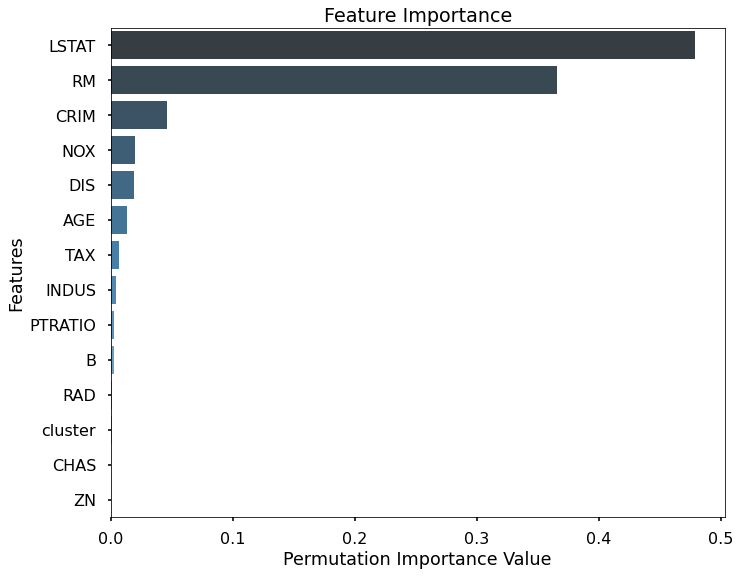

In [16]:
mw.importance(df, 'price', estimator=RandomForestRegressor(random_state=42))

It appears that `LSTAT` and `RM` are most important for predicting price.

### Topic Modeling
Since the Boston housing data set does not contain textual features, the 20 newsgroups text dataset is used to demonstrate the **Topic Modeling** widget.

In [17]:
from sklearn.datasets import fetch_20newsgroups

In [18]:
dat = fetch_20newsgroups(subset='test')
df2 = pd.DataFrame({'text': dat['data']})
df2 = df2.sample(150)

In [19]:
df2.head()

,text
3213,From: ashok@biochemistry.cwru.edu (Ashok Aiyar...
2695,From: pat@rwing.UUCP (Pat Myrto)\nSubject: Re:...
7501,From: tflynn@encore.com (Tonya R. Flynn)\nSubj...
7425,From: kempmp@phoenix.oulu.fi (Petri Pihko)\nSu...
5264,From: v111qheg@ubvmsb.cc.buffalo.edu (P.VASILI...


Text preprocessing can be applied before topic modeling to improve accuracy.

In [20]:
from mwdata.text.text_preprocessing import preprocess_texts, bag_of_words_to_docs
processed = preprocess_texts(df2['text'])
text = bag_of_words_to_docs(processed)

In [21]:
from mwdata.text.topic_model import topic_modeling

In [22]:
topic_modeling(df2, col='text', num_topics=3)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.052576  0.079847       1        1  50.809837
0     -0.072752 -0.071714       2        1  27.070633
2      0.125328 -0.008133       3        1  22.119526, topic_info=                        Term       Freq      Total Category  logprob  loglift
125  organization_university  62.000000  62.000000  Default  30.0000  30.0000
9               posting_host  37.000000  37.000000  Default  29.0000  29.0000
4                  line_nntp  35.000000  35.000000  Default  28.0000  28.0000
75            writes_article  58.000000  58.000000  Default  27.0000  27.0000
166         state_university  28.000000  28.000000  Default  26.0000  26.0000
..                       ...        ...        ...      ...      ...      ...
151                    world  10.363239  37.419048   Topic3  -4.6039   0.2248
157                    right  11.877937  50.039619   Topic3  -4.4674   0.0706
164                  someone   7.569444  20.180923   Topic3  -4.9180   0.5281
53                   against   8.423180  33.434937   Topic3  -4.8111   0.1301
165                     year   7.975691  36.396049   Topic3  -4.8657  -0.0094

[162 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
52        1  0.768236    after
52        2  0.132455    after
52        3  0.105964    after
53        1  0.508450  against
53        2  0.239271  against
...     ...       ...      ...
152       1  0.433470    wrote
152       2  0.557318    wrote
165       1  0.549510     year
165       2  0.219804     year
165       3  0.219804     year

[305 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

## Geospatial Mapping

Since the Boston housing dataset does not include geospatial markers, the XXX data set is used to demonstrate the **geospatial** mapping widget.

In [23]:
# This example is not yet available.

## Model Evaluation
While not strictly part of Exploratory Data Analysis, some widgets are also provided for evaluating binary classification models.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# Simple model
X = df[[c for c in df.columns if c != 'price']]
y = df.price.apply(lambda x: x > 20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestClassifier(max_depth=3, n_estimators=10, random_state=4).fit(X_train, y_train)
pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:, 1]

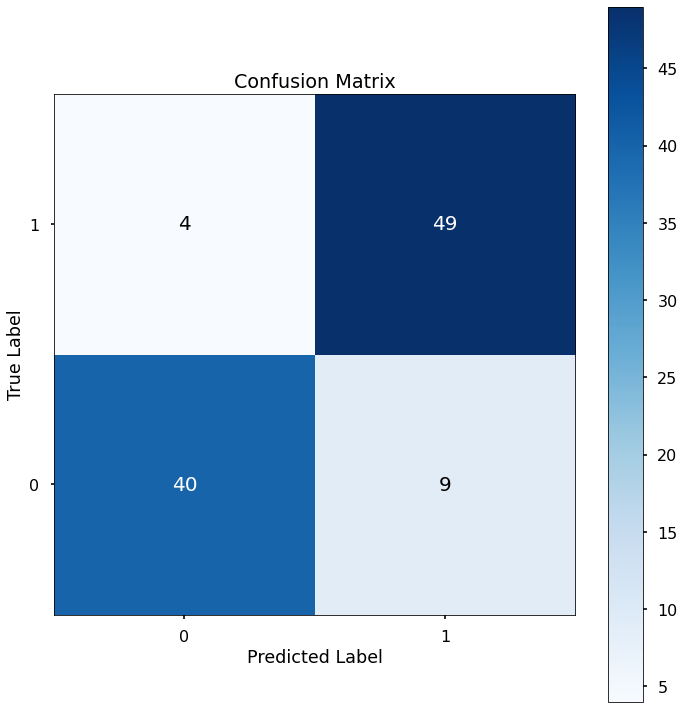

In [25]:
from mwdata.modeling.score import confusion_matrix
confusion_matrix(y_test, pred)

In [26]:
from mwdata.modeling.score import metric_table
metric_table(y_test, pred_proba)

,Accuracy,Precision,Recall,F1,AUC
0,0.872549,0.844828,0.924528,0.882883,0.949942
